In [53]:
# Jordan Siegel
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

FY23 = "Resources/FY23.csv"
FY24 = "Resources/FY24.csv"
FY23_df = pd.read_csv(FY23)
FY24_df = pd.read_csv(FY24)
import pandas as pd
FY23 = "Resources/FY23.csv"
FY24 = "Resources/FY24.csv"
# Read the CSV files into DataFrames
FY23_df = pd.read_csv(FY23)
FY24_df = pd.read_csv(FY24)
# Concatenate the DataFrames
combined_df = pd.concat([FY23_df, FY24_df])
# Remove rows with exactly the same values
combined_df = combined_df.drop_duplicates()
# Convert 'appt date' column to datetime format
combined_df['appt date'] = pd.to_datetime(combined_df['appt date'], format='%m/%d/%y')
# Sort the combined DataFrame by the 'appt date' column
sorted_df = combined_df.sort_values(by='appt date')
sorted_df

,patient id,check in date,appt date,patient age,patient zip,school code,appt type,act score,school days missed,er visits,hospitalizations
1520,13403,6/29/23,2022-07-13,9,60629,NaN,NEW PATIENT 45,15.0,0.0,0.0,0.0
4176,17896,3/22/23,2022-07-13,7,60629,334,NEW PATIENT 45,24.0,0.0,2.0,8.0
5735,20749,3/15/23,2022-07-13,5,60629,334,NEW PATIENT 45,99.0,0.0,0.0,0.0
5776,20788,3/16/23,2022-07-13,9,60629,334,SKIN TEST 45,17.0,10.0,0.0,0.0
524,11825,6/29/23,2022-07-13,11,60629,334,NEW PATIENT 45,24.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1457,21723,3/28/24,2024-03-28,13,60632,310.0,Telehealth,NaN,NaN,NaN,NaN
1456,21723,3/28/24,2024-03-28,13,60632,310.0,Telehealth,25.0,0.0,0.0,0.0
1408,21443,3/28/24,2024-03-28,16,60632,310.0,Telehealth,20.0,0.0,0.0,0.0
1152,19705,3/28/24,2024-03-28,14,60632,310.0,Telehealth,24.0,0.0,0.0,0.0


In [54]:
# counting number of visits for each patient
grouped = sorted_df.groupby("patient id")
visits = grouped["appt date"].count()

In [55]:
# Drop any rows with null values
clean = combined_df.dropna()
clean.head()

,patient id,check in date,appt date,patient age,patient zip,school code,appt type,act score,school days missed,er visits,hospitalizations
0,11115,1/31/23,2023-01-31,17,60639,331,FOLLOW UP 30,24.0,0.0,0.0,0.0
4,11115,5/24/23,2023-05-24,17,60639,331,SKIN TEST 45,24.0,0.0,0.0,0.0
12,11115,6/6/23,2022-09-01,17,60639,331,FOLLOW UP 30,25.0,0.0,0.0,0.0
14,11121,2/14/23,2023-02-14,17,60623,344,Telehealth,24.0,0.0,0.0,0.0
18,11121,6/27/23,2022-09-26,17,60623,344,FOLLOW UP 45 MIN,24.0,0.0,0.0,0.0


In [56]:
# removing invalid scores
clean = clean[clean["act score"] <= 28]

In [57]:
clean["medical visits"] = clean["er visits"] + clean["hospitalizations"]
clean

,patient id,check in date,appt date,patient age,patient zip,school code,appt type,act score,school days missed,er visits,hospitalizations,medical visits
0,11115,1/31/23,2023-01-31,17,60639,331,FOLLOW UP 30,24.0,0.0,0.0,0.0,0.0
4,11115,5/24/23,2023-05-24,17,60639,331,SKIN TEST 45,24.0,0.0,0.0,0.0,0.0
12,11115,6/6/23,2022-09-01,17,60639,331,FOLLOW UP 30,25.0,0.0,0.0,0.0,0.0
14,11121,2/14/23,2023-02-14,17,60623,344,Telehealth,24.0,0.0,0.0,0.0,0.0
18,11121,6/27/23,2022-09-26,17,60623,344,FOLLOW UP 45 MIN,24.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2331,23218,3/12/24,2024-03-12,8,60087,153.0,NEW PATIENT 60,15.0,25.0,15.0,1.0,16.0
2333,23227,3/22/24,2024-03-22,4,60626,157.0,NEW PATIENT 45,23.0,2.0,6.0,2.0,8.0
2335,23232,3/15/24,2024-03-15,6,60085,152.0,NEW PATIENT 60,21.0,12.0,2.0,0.0,2.0
2337,23233,3/15/24,2024-03-15,8,60085,152.0,NEW PATIENT 60,12.0,6.0,4.0,0.0,4.0


In [58]:
# finding mean act score for each patient
grouped = clean.groupby("patient id")
mean_act = grouped["act score"].mean()

# creating summary dataframe
summary = pd.merge(visits, mean_act, on="patient id")
summary = summary.rename(columns={"appt date": 'Number of Visits', "act score": "Mean ACT Score"})
summary


# summary stats
grouped = clean.groupby("patient id")
mean_act = grouped["act score"].mean()
patient_age = grouped["patient age"].mean()

summary = pd.merge(visits, patient_age, on="patient id")
summary = pd.merge(summary, mean_act, on="patient id")

summary = summary.rename(columns={"appt date": 'Number of Visits', "act score": "Mean ACT Score"})
summary


,Number of Visits,patient age,Mean ACT Score
patient id,,,
11115,13,17.571429,23.857143
11121,7,17.250000,24.250000
11131,2,18.000000,15.000000
11132,2,9.000000,17.500000
11137,7,14.250000,24.250000
...,...,...,...
23218,2,8.000000,15.000000
23227,2,4.000000,23.000000
23232,2,6.000000,21.000000


PearsonRResult(statistic=0.12430119883882294, pvalue=0.0003284217962638128)
0.1337036677035859


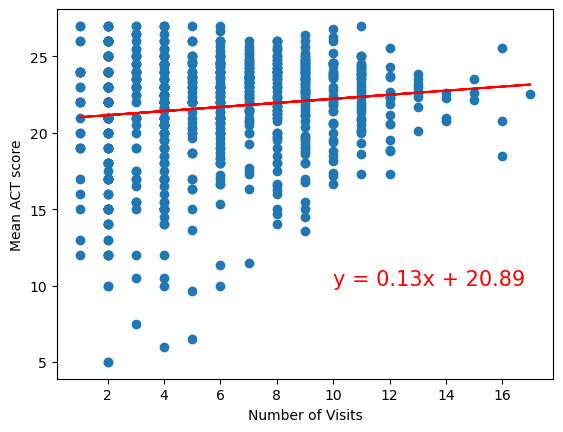

In [60]:
# capturing the x and y values
x_values = summary['Number of Visits']
y_values = summary['Mean ACT Score']

# storing the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# finding the correlation
print(f"{st.pearsonr(x_values,y_values)}")
print(slope)

# making the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 10),fontsize=15,color="red")
plt.xlabel("Number of Visits")
plt.ylabel("Mean ACT score")
plt.show()

PearsonRResult(statistic=0.15080149935845963, pvalue=1.2676805594473993e-05)
0.12811251048298083


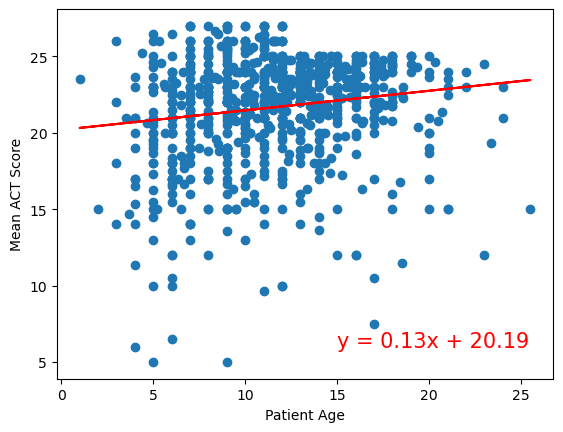

In [61]:
# capturing the x and y values
x_values = summary['patient age']
y_values = summary['Mean ACT Score']

# storing the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# finding the correlation
print(f"{st.pearsonr(x_values,y_values)}")
print(slope)

# making the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 6),fontsize=15,color="red")
plt.xlabel("Patient Age")
plt.ylabel("Mean ACT Score")
plt.show()

PearsonRResult(statistic=-0.2546281968519247, pvalue=2.1559892114942301e-35)
-0.3229117550108539


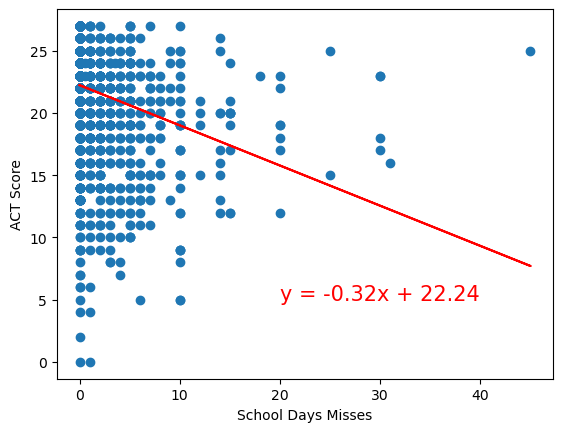

In [62]:
# remove invalid values
clean = clean[clean["school days missed"] <= 70]

# capturing the x and y values
x_values = clean['school days missed']
y_values = clean['act score']

# storing the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# finding the correlation
print(f"{st.pearsonr(x_values,y_values)}")
print(slope)

# making the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 5),fontsize=15,color="red")
plt.xlabel("School Days Misses")
plt.ylabel("ACT Score")
plt.show()

PearsonRResult(statistic=-0.17357102049739795, pvalue=4.986876993101208e-17)
-0.6466848684857427


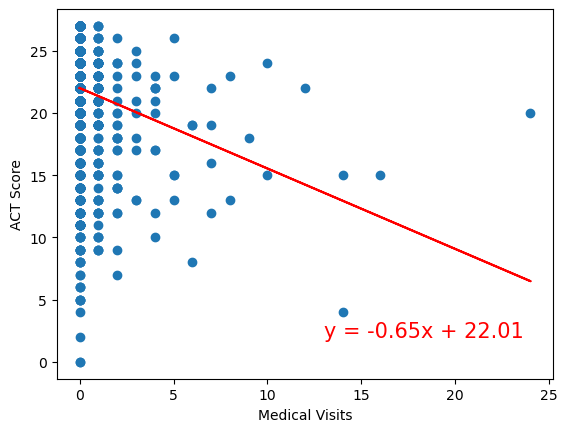

In [63]:
# remove invalid values
clean = clean[clean["medical visits"] <= 70]

# capturing the x and y values
x_values = clean['medical visits']
y_values = clean['act score']

# storing the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# finding the correlation
print(f"{st.pearsonr(x_values,y_values)}")
print(slope)

# making the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(13, 2),fontsize=15,color="red")
plt.ylabel("ACT Score")
plt.xlabel("Medical Visits")
plt.show()

In [37]:
# Convert 'Date' column to datetime type
clean['appt date'] = pd.to_datetime(clean['appt date'])

# Extract month from 'Date' column
clean['Month'] = clean['appt date'].dt.month

# Define conditions and corresponding values
# found this method of creating new column based on another columns infor from chatgbt
conditions = [
    (clean["Month"].isin([1, 2, 12])),
    (clean["Month"].isin([9, 10, 11])),
    (clean["Month"].isin([3, 4, 5]))
]
choices = ['Winter', 'Fall', 'Spring']

# Apply conditions using np.select
clean["Season"] = np.select(conditions, choices, default='Summer')
clean.head()

,patient id,check in date,appt date,patient age,patient zip,school code,appt type,act score,school days missed,er visits,hospitalizations,medical visits,Month,Season
0,11115,1/31/23,2023-01-31,17,60639,331,FOLLOW UP 30,24.0,0.0,0.0,0.0,0.0,1,Winter
4,11115,5/24/23,2023-05-24,17,60639,331,SKIN TEST 45,24.0,0.0,0.0,0.0,0.0,5,Spring
12,11115,6/6/23,2022-09-01,17,60639,331,FOLLOW UP 30,25.0,0.0,0.0,0.0,0.0,9,Fall
14,11121,2/14/23,2023-02-14,17,60623,344,Telehealth,24.0,0.0,0.0,0.0,0.0,2,Winter
18,11121,6/27/23,2022-09-26,17,60623,344,FOLLOW UP 45 MIN,24.0,0.0,0.0,0.0,0.0,9,Fall


In [38]:
season_group = clean.groupby("Season")
season_means = season_group["act score"].mean()
season_means

Season
Fall      21.539310
Spring    21.681275
Summer    23.253378
Winter    21.821566
Name: act score, dtype: float64

In [39]:
seasons = ["Winter", "Fall", "Spring", "Summer"]

# Create empty list to fill with tumor vol data (for plotting)
scores = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for t in seasons:
    # Locate the rows which contain each season and get the act score
    rows = clean.loc[clean["Season"] == t, "act score"]
    scores.append(rows)

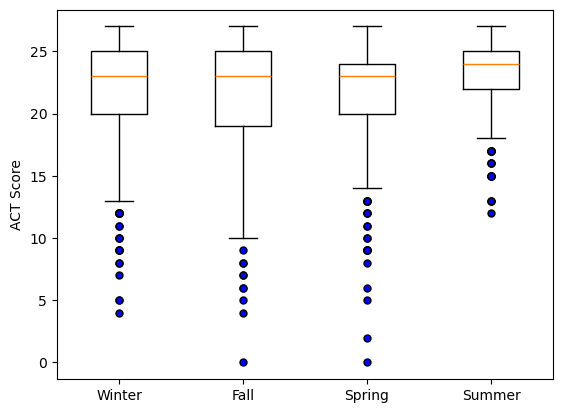

In [40]:
# make the boxplot
plt.boxplot(scores, flierprops=dict(markerfacecolor='b', markersize=5))
plt.xticks([1, 2, 3, 4], ["Winter", "Fall", "Spring", "Summer"])
plt.ylabel('ACT Score')
plt.show()

In [43]:
# Extract individual groups
group0 = clean[clean["Season"] == "Fall"]["act score"]
group1 = clean[clean["Season"] == "Spring"]["act score"]
group2 = clean[clean["Season"] == "Summer"]["act score"]
group3 = clean[clean["Season"] == "Winter"]["act score"]


In [44]:
# Perform the ANOVA
st.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=14.413508305216691, pvalue=2.650781585145552e-09)

In [47]:
clean = clean.rename(columns={"act score": "act_score"})

# Perform one-way ANOVA
model = sm.formula.ols('act_score ~ Season', data=clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print("ANOVA Table:")
print(anova_table)

# Perform Tukey's HSD test as post-hoc analysis
tukey_results = pairwise_tukeyhsd(clean['act_score'], clean['Season'])

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
print(tukey_results)

ANOVA Table:
                sum_sq      df          F        PR(>F)
Season      664.852762     3.0  14.413508  2.650782e-09
Residual  35333.327950  2298.0        NaN           NaN

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Fall Spring    0.142 0.9246 -0.4434  0.7273  False
  Fall Summer   1.7141    0.0  1.0187  2.4094   True
  Fall Winter   0.2823 0.5026  -0.238  0.8025  False
Spring Summer   1.5721    0.0  0.8333  2.3109   True
Spring Winter   0.1403  0.924 -0.4367  0.7173  False
Summer Winter  -1.4318    0.0 -2.1201 -0.7435   True
----------------------------------------------------
